# Ejercicio SVM datos Eurocopa 2012
A partir del archivo Euro_2012_stats_TEAM, se pide:

1. Obtener la matriz de correlación. ¿Qué columnas están mejor correlacionadas?

2. ¿Existe algún tipo de relación entre la precisión de disparo a puerta (Shooting Accuracy) con respecto a los goles? Muestra en una gráfica (pintando la línea en la distribución de ambas variables) y usando Regresión Lineal, Regresión no Lineal con polinomio y SVR la relación entre ambos

3. Si tratamos la columna Goals como una columna categórica y usando logistic regression, SVM y Random forest, ¿cuántos goles marcaría un equipo que tiene...? (por cada algoritmo):

    - % de goles por disparo: 40%
    - Total shots (inc. Blocked): 102
    - Corners Taken: 5
    - Passes: 82
    - Dribbles: 23

## 1. Importa las librerias necesarias

In [2]:
import pandas as pd
import numpy as np
from sklearn.svm import LinearSVC
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Carga los datos

In [3]:
df = pd.read_csv("data/Euro_2012_stats_TEAM.csv")
df

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


## 3. Obtener la matriz de correlación con TODAS las variables. ¿Hay algunas columnas que estén muy correlacionadas?

In [4]:
df.corr()

,Goals,Shots on target,Shots off target,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,Headed goals,Passes,Passes completed,...,Goals conceded,Saves made,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
Goals,1.000000,0.804193,0.403821,0.650109,0.200512,0.730437,0.023094,0.349330,0.838497,0.830062,...,-0.337689,0.143912,0.663876,0.483833,0.703043,0.337709,-3.580574e-01,0.727830,0.727830,0.136067
Shots on target,0.804193,1.000000,0.611185,0.886090,0.212932,0.478610,-0.229945,0.210571,0.930337,0.923242,...,-0.214415,0.085059,0.765949,0.658353,0.696263,0.544307,-3.340500e-01,0.821342,0.821342,0.249516
Shots off target,0.403821,0.611185,1.000000,0.887032,0.581655,0.126783,-0.173221,0.002284,0.624451,0.612998,...,-0.139274,0.086157,0.615058,0.434815,0.344626,0.534186,-3.377661e-01,0.544974,0.544974,0.045973
Total shots (inc. Blocked),0.650109,0.886090,0.887032,1.000000,0.400121,0.299397,-0.234668,0.125738,0.875698,0.864279,...,-0.184740,0.148269,0.766215,0.623288,0.589635,0.622268,-3.604662e-01,0.763336,0.763336,0.157812
Hit Woodwork,0.200512,0.212932,0.581655,0.400121,1.000000,-0.076923,-0.041345,0.020174,0.095882,0.073814,...,0.062541,-0.230524,0.141180,0.303987,0.113657,0.319708,-2.820513e-01,0.204511,0.204511,-0.189466
Penalty goals,0.730437,0.478610,0.126783,0.299397,-0.076923,1.000000,0.537484,-0.020174,0.545294,0.550720,...,-0.020847,0.058761,0.528185,0.114404,0.627220,0.085467,1.794872e-01,0.531727,0.531727,0.351866
Penalties not scored,0.023094,-0.229945,-0.173221,-0.234668,-0.041345,0.537484,1.000000,-0.357830,-0.169613,-0.179278,...,0.302532,0.051019,0.163643,-0.107169,0.210417,0.127603,5.374838e-01,0.084796,0.084796,0.480079
Headed goals,0.349330,0.210571,0.002284,0.125738,0.020174,-0.020174,-0.357830,1.000000,0.213073,0.200605,...,-0.344447,0.458773,0.157215,0.117445,0.188786,0.067245,-3.429623e-01,0.216077,0.216077,-0.447214
Passes,0.838497,0.930337,0.624451,0.875698,0.095882,0.545294,-0.169613,0.213073,1.000000,0.997697,...,-0.284982,0.207240,0.773382,0.549248,0.731938,0.465799,-4.002506e-01,0.800546,0.800546,0.232214
Passes completed,0.830062,0.923242,0.612998,0.864279,0.073814,0.550720,-0.179278,0.200605,0.997697,1.000000,...,-0.300837,0.184878,0.738845,0.499351,0.704802,0.420410,-4.062897e-01,0.766326,0.766326,0.213345


In [5]:
corr_abs = np.abs(df.corr())
correlation_df = corr_abs[(corr_abs > 0.95) & (corr_abs < 1)]
more_correlated = [column for column in correlation_df.notna().columns if any(correlation_df.notna()[column] == True)]
print("Las siguientes columnas presentan una correlación mayor del 95% con cualquier otra columna del dataframe:\n",more_correlated)

Las siguientes columnas presentan una correlación mayor del 95% con cualquier otra columna del dataframe:
 ['Passes', 'Passes completed', 'Touches']


## 4. ¿Existe algún tipo de relación entre la precisión de disparo a puerta (Shooting Accuracy) con respecto a los goles? Muestra en una gráfica (pintando la línea en la distribución de ambas variables) y usando Regresión Lineal, Regresión no Lineal con polinomio y SVR la relación entre ambos

In [6]:
goles.dtypes

NameError: name 'goles' is not defined

In [7]:
goles = df.copy()

In [8]:
goles

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


In [9]:
goles = goles[['Shooting Accuracy','Goals']]

In [10]:
goles

,Shooting Accuracy,Goals
0,51.9%,4
1,41.9%,4
2,50.0%,4
3,50.0%,5
4,37.9%,3
5,47.8%,10
6,30.7%,5
7,43.0%,6
8,25.0%,2
9,39.4%,2


In [12]:
goles['Shooting Accuracy']= goles['Shooting Accuracy'].str.replace('%','')
goles['Shooting Accuracy']= goles['Shooting Accuracy'].astype(float)



c:\Users\usuario\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\Users\usuario\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
goles

,Shooting Accuracy,Goals
0,51.9,4
1,41.9,4
2,50.0,4
3,50.0,5
4,37.9,3
5,47.8,10
6,30.7,5
7,43.0,6
8,25.0,2
9,39.4,2


In [15]:
X = goles[['Shooting Accuracy']]
y = goles[['Goals']]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size=0.8,
                                                    random_state=0)

print(f"X_train: {X_train.shape}\ty_train: {y_train.shape}")
print(f"X_test: {X_test.shape}\ty_test: {y_test.shape}")

X_train: (12, 1)	y_train: (12, 1)
X_test: (4, 1)	y_test: (4, 1)


In [16]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [18]:
y_hat = lm.predict(X_test)
y_hat

array([[5.29997592],
       [3.73793799],
       [2.94297226],
       [4.95130674]])

In [22]:
y_hat_train = lm.predict(X_train)
y_hat_train

array([[7.25252332],
       [4.74210523],
       [6.42966406],
       [6.03915458],
       [4.24002161],
       [5.45339035],
       [2.41299511],
       [4.58869079],
       [6.42966406],
       [6.69465263],
       [6.12283518],
       [2.59430308]])

In [26]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

In [27]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

c:\Users\usuario\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\usuario\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [28]:
y_hat2 = lr.predict(X_test)
y_hat2

array([5, 5, 5, 5], dtype=int64)

In [29]:
y_hat2_train = lr.predict(X_train)
y_hat2_train

array([4, 5, 4, 5, 5, 5, 2, 5, 4, 4, 5, 2], dtype=int64)

In [35]:
from sklearn.svm import SVR
lm_svr = SVR()
lm_svr.fit(X_train, y_train)
y_hat3 = lm_svr.predict(X_test)
y_hat3_train = lm_svr.predict(X_train)


c:\Users\usuario\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('MODELO REGRESION LINEAL')

print("\n")

print(f"MSE Train: {mean_squared_error(y_train, y_hat_train):.2f}")
print(f"MAE Train: {mean_absolute_error(y_train, y_hat_train):.2f}")
print(f"R^2 Train: {r2_score(y_train, y_hat_train):.2f}")

print("\n\n")

print(f"MSE Test: {mean_squared_error(y_test, y_hat):.2f}")
print(f"MAE Test: {mean_absolute_error(y_test, y_hat):.2f}")
print(f"R^2 Test: {r2_score(y_test, y_hat):.2f}")

print("\n")

print('MODELO REGRESION LOGISTICA')

print("\n")

print(f"MSE Train: {mean_squared_error(y_train, y_hat2_train):.2f}")
print(f"MAE Train: {mean_absolute_error(y_train, y_hat2_train):.2f}")
print(f"R^2 Train: {r2_score(y_train, y_hat2_train):.2f}")

print("\n\n")

print(f"MSE Test: {mean_squared_error(y_test, y_hat2):.2f}")
print(f"MAE Test: {mean_absolute_error(y_test, y_hat2):.2f}")
print(f"R^2 Test: {r2_score(y_test, y_hat2):.2f}")

MODELO REGRESION LINEAL


MSE Train: 6.59
MAE Train: 2.22
R^2 Train: 0.26



MSE Test: 3.22
MAE Test: 1.61
R^2 Test: -0.91


MODELO REGRESION LOGISTICA


MSE Train: 10.08
MAE Train: 2.08
R^2 Train: -0.14



MSE Test: 4.75
MAE Test: 1.75
R^2 Test: -1.81
MODELO SVR


MSE Train: 8.67
MAE Train: 2.08
R^2 Train: 0.02



MSE Test: 4.12
MAE Test: 1.65
R^2 Test: -1.44




In [37]:
print('MODELO SVR')

print("\n")

print(f"MSE Train: {mean_squared_error(y_train, y_hat3_train):.2f}")
print(f"MAE Train: {mean_absolute_error(y_train, y_hat3_train):.2f}")
print(f"R^2 Train: {r2_score(y_train, y_hat3_train):.2f}")

print("\n\n")

print(f"MSE Test: {mean_squared_error(y_test, y_hat3):.2f}")
print(f"MAE Test: {mean_absolute_error(y_test, y_hat3):.2f}")
print(f"R^2 Test: {r2_score(y_test, y_hat3):.2f}")

print("\n")

MODELO SVR


MSE Train: 8.67
MAE Train: 2.08
R^2 Train: 0.02



MSE Test: 4.12
MAE Test: 1.65
R^2 Test: -1.44




<Figure size 1600x1000 with 0 Axes>

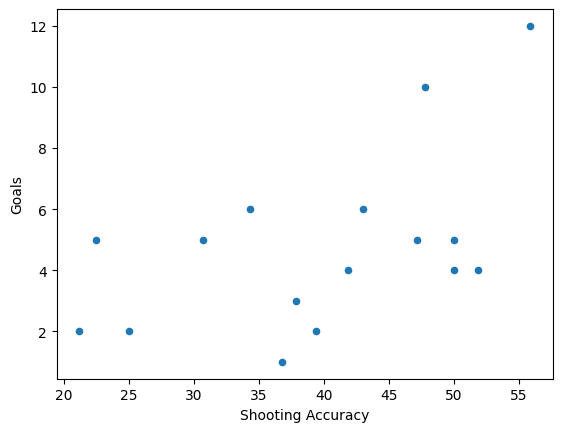

In [20]:
plt.figure(figsize=(16,10))
goles.plot.scatter(x='Shooting Accuracy', y='Goals')
plt.show()

## 5. Si tratamos la columna Goals como una columna categórica y usando logistic regression, SVM y Random forest, ¿cuántos goles marcaría un equipo que tiene...? (por cada algoritmo):

    - % de goles por disparo: 40%
    - Total shots (inc. Blocked): 102
    - Corners Taken: 5
    - Passes: 82
    - Dribbles: 23